In [31]:
import chipwhisperer as cw
from tqdm.notebook import tqdm
import numpy
import numpy as np

numpy.set_printoptions(threshold=numpy.inf)

%matplotlib notebook
import matplotlib.pylab as plt

In [32]:
help(cw)

Help on package chipwhisperer:

NAME
    chipwhisperer

DESCRIPTION
    .. module:: chipwhisperer
       :platform: Unix, Windows
       :synopsis: Test
    
    .. moduleauthor:: NewAE Technology Inc.
    
    Main module for ChipWhisperer.

PACKAGE CONTENTS
    analyzer (package)
    capture (package)
    common (package)
    hardware (package)
    logging

SUBMODULES
    key_text_patterns
    ktp
    programmers
    project
    scopes
    targets
    util

FUNCTIONS
    capture_trace(scope, target, plaintext, key=None, ack=True)
        Capture a trace, sending plaintext and key
        
        Does all individual steps needed to capture a trace (arming the scope
        sending the key/plaintext, getting the trace data back, etc.). Uses
        target.output_len as the length of the expected target reponse for
        simpleserial.
        
        Args:
            scope (ScopeTemplate): Scope object to use for capture.
            target (TargetTemplate): Target object to read/w

In [33]:
scope = cw.scope()

In [4]:
scope.fw_version

{'major': 0, 'minor': 30, 'debug': 0}

In [34]:
scope

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 30
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x01')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 5000
glitch = 
    repeat     = 0
    ext_offset = 0

In [6]:
print(scope.get_serial_ports())

[]


In [7]:
!ls /dev | grep cw

cw_serial0


In [58]:
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted

In [59]:
print(target)

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	


In [37]:
scope.default_setup()

In [36]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'
SS_VER = 'SS_VER_1_1'

In [35]:
prog = cw.programmers.STM32FProgrammer

In [12]:
# %%bash -s "$PLATFORM" "$SS_VER"
# cd hardware/victims/firmware/test
# make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

In [13]:
# cw.program_target(scope, cw.programmers.STM32FProgrammer, "hardware/victims/firmware/test/test.c")

In [38]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "csaw_esc_2021/challenges/set-1/recall/recall-CWNANO.hex")

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 4983 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 4983 bytes


In [40]:
import time

def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high_z'
    time.sleep(0.05)

In [16]:
# msg = bytearray([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) 
# target.simpleserial_write('a', msg)

In [17]:
recv_msg = ""

In [18]:
recv_msg += target.read() #you might have to run this block a few times to get the full message
print(recv_msg)

In [18]:
import binascii

In [39]:
#Testing out the data format

msg= '/223ir329921d1{}'
data = bytearray(bytes(ord(i) for i in msg))
alt = bytearray(bytes(msg, encoding="utf8"))
#newdata  = binascii.b2a_uu(data)
print(data)
print(alt)
len(data)


CWbytearray(b'2f 32 32 33 69 72 33 32 39 39 32 31 64 31 7b 7d')
CWbytearray(b'2f 32 32 33 69 72 33 32 39 39 32 31 64 31 7b 7d')


16

In [22]:
scope.adc.samples = 3000 # Default is 5000

In [23]:
print(scope.adc.samples)

3000


In [202]:
def cap_pass_trace(pass_guess):
    reset_target(scope)
    num_char = target.in_waiting()
    #print("In buffer :", target.read())
    #print("num_char:", num_char)
    while num_char > 0:
        target.read(num_char, 10)
        time.sleep(0.01)
        num_char = target.in_waiting()

    scope.arm()
    #target.write(pass_guess)
    passguess_en = bytearray(bytes(pass_guess, encoding='utf8'))
    print("Current attempt ", str(pass_guess),"Encoded: ", str(passguess_en), len(passguess_en))
    target.simpleserial_write('a', bytearray(bytes(pass_guess, encoding='utf8')), '\n')
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')

    trace = scope.get_last_trace()
    return trace

In [209]:
# Do some plotting

In [210]:
## Finding letter by letter

<IPython.core.display.Javascript object>


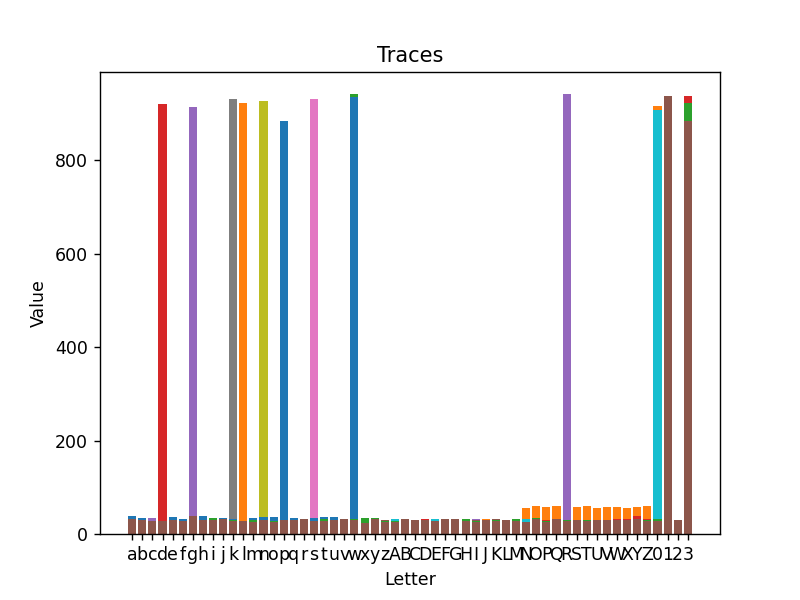

Current attempt  ################ Encoded:  CWbytearray(b'23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16


  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  a############### Encoded:  CWbytearray(b'61 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
a diff = 30.4140625
Current attempt  b############### Encoded:  CWbytearray(b'62 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
b diff = 29.07421875
Current attempt  c############### Encoded:  CWbytearray(b'63 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
c diff = 25.34375
Current attempt  d############### Encoded:  CWbytearray(b'64 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
d diff = 29.13671875
Current attempt  e############### Encoded:  CWbytearray(b'65 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
e diff = 25.73828125
Current attempt  f############### Encoded:  CWbytearray(b'66 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
f diff = 24.96875
Current attempt  g############### Encoded:  CWbytearray(b'67 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
g diff = 27.734375
Current attempt  h############### Encoded:  CWbytearray(b'68 23 23 23 23 23 23 23 23 

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  pa############## Encoded:  CWbytearray(b'70 61 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
a diff = 26.578125
Current attempt  pb############## Encoded:  CWbytearray(b'70 62 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
b diff = 27.54296875
Current attempt  pc############## Encoded:  CWbytearray(b'70 63 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
c diff = 25.47265625
Current attempt  pd############## Encoded:  CWbytearray(b'70 64 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
d diff = 25.33203125
Current attempt  pe############## Encoded:  CWbytearray(b'70 65 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
e diff = 28.58203125
Current attempt  pf############## Encoded:  CWbytearray(b'70 66 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
f diff = 29.58203125
Current attempt  pg############## Encoded:  CWbytearray(b'70 67 23 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
g diff = 28.37109375
Current attempt  ph############## Encoded:  CWbytearray(b'70 68 23 23 23 23 23

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0a############# Encoded:  CWbytearray(b'70 30 61 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
a diff = 28.15234375
Current attempt  p0b############# Encoded:  CWbytearray(b'70 30 62 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
b diff = 28.1796875
Current attempt  p0c############# Encoded:  CWbytearray(b'70 30 63 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
c diff = 27.19921875
Current attempt  p0d############# Encoded:  CWbytearray(b'70 30 64 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
d diff = 26.33203125
Current attempt  p0e############# Encoded:  CWbytearray(b'70 30 65 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
e diff = 29.55859375
Current attempt  p0f############# Encoded:  CWbytearray(b'70 30 66 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
f diff = 29.99609375
Current attempt  p0g############# Encoded:  CWbytearray(b'70 30 67 23 23 23 23 23 23 23 23 23 23 23 23 23') 16
g diff = 27.859375
Current attempt  p0h############# Encoded:  CWbytearray(b'70 30 68 23 23 23 23 

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0wa############ Encoded:  CWbytearray(b'70 30 77 61 23 23 23 23 23 23 23 23 23 23 23 23') 16
a diff = 32.953125
Current attempt  p0wb############ Encoded:  CWbytearray(b'70 30 77 62 23 23 23 23 23 23 23 23 23 23 23 23') 16
b diff = 28.8671875
Current attempt  p0wc############ Encoded:  CWbytearray(b'70 30 77 63 23 23 23 23 23 23 23 23 23 23 23 23') 16
c diff = 29.171875
Current attempt  p0wd############ Encoded:  CWbytearray(b'70 30 77 64 23 23 23 23 23 23 23 23 23 23 23 23') 16
d diff = 28.71875
Current attempt  p0we############ Encoded:  CWbytearray(b'70 30 77 65 23 23 23 23 23 23 23 23 23 23 23 23') 16
e diff = 25.76953125
Current attempt  p0wf############ Encoded:  CWbytearray(b'70 30 77 66 23 23 23 23 23 23 23 23 23 23 23 23') 16
f diff = 29.66796875
Current attempt  p0wg############ Encoded:  CWbytearray(b'70 30 77 67 23 23 23 23 23 23 23 23 23 23 23 23') 16
g diff = 32.66796875
Current attempt  p0wh############ Encoded:  CWbytearray(b'70 30 77 68 23 23 23 23 23

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3a########### Encoded:  CWbytearray(b'70 30 77 33 61 23 23 23 23 23 23 23 23 23 23 23') 16
a diff = 27.92578125
Current attempt  p0w3b########### Encoded:  CWbytearray(b'70 30 77 33 62 23 23 23 23 23 23 23 23 23 23 23') 16
b diff = 30.21875
Current attempt  p0w3c########### Encoded:  CWbytearray(b'70 30 77 33 63 23 23 23 23 23 23 23 23 23 23 23') 16
c diff = 28.4140625
Current attempt  p0w3d########### Encoded:  CWbytearray(b'70 30 77 33 64 23 23 23 23 23 23 23 23 23 23 23') 16
d diff = 28.734375
Current attempt  p0w3e########### Encoded:  CWbytearray(b'70 30 77 33 65 23 23 23 23 23 23 23 23 23 23 23') 16
e diff = 21.515625
Current attempt  p0w3f########### Encoded:  CWbytearray(b'70 30 77 33 66 23 23 23 23 23 23 23 23 23 23 23') 16
f diff = 28.82421875
Current attempt  p0w3g########### Encoded:  CWbytearray(b'70 30 77 33 67 23 23 23 23 23 23 23 23 23 23 23') 16
g diff = 29.05859375
Current attempt  p0w3h########### Encoded:  CWbytearray(b'70 30 77 33 68 23 23 23 23

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3Ra########## Encoded:  CWbytearray(b'70 30 77 33 52 61 23 23 23 23 23 23 23 23 23 23') 16
a diff = 32.54296875
Current attempt  p0w3Rb########## Encoded:  CWbytearray(b'70 30 77 33 52 62 23 23 23 23 23 23 23 23 23 23') 16
b diff = 29.171875
Current attempt  p0w3Rc########## Encoded:  CWbytearray(b'70 30 77 33 52 63 23 23 23 23 23 23 23 23 23 23') 16
c diff = 28.0
Current attempt  p0w3Rd########## Encoded:  CWbytearray(b'70 30 77 33 52 64 23 23 23 23 23 23 23 23 23 23') 16
d diff = 28.5703125
Current attempt  p0w3Re########## Encoded:  CWbytearray(b'70 30 77 33 52 65 23 23 23 23 23 23 23 23 23 23') 16
e diff = 31.6796875
Current attempt  p0w3Rf########## Encoded:  CWbytearray(b'70 30 77 33 52 66 23 23 23 23 23 23 23 23 23 23') 16
f diff = 24.49609375
Current attempt  p0w3Rg########## Encoded:  CWbytearray(b'70 30 77 33 52 67 23 23 23 23 23 23 23 23 23 23') 16
g diff = 30.01953125
Current attempt  p0w3Rh########## Encoded:  CWbytearray(b'70 30 77 33 52 68 23 23 23 23

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1a######### Encoded:  CWbytearray(b'70 30 77 33 52 31 61 23 23 23 23 23 23 23 23 23') 16
a diff = 27.375
Current attempt  p0w3R1b######### Encoded:  CWbytearray(b'70 30 77 33 52 31 62 23 23 23 23 23 23 23 23 23') 16
b diff = 28.58203125
Current attempt  p0w3R1c######### Encoded:  CWbytearray(b'70 30 77 33 52 31 63 23 23 23 23 23 23 23 23 23') 16
c diff = 27.17578125
Current attempt  p0w3R1d######### Encoded:  CWbytearray(b'70 30 77 33 52 31 64 23 23 23 23 23 23 23 23 23') 16
d diff = 28.05859375
Current attempt  p0w3R1e######### Encoded:  CWbytearray(b'70 30 77 33 52 31 65 23 23 23 23 23 23 23 23 23') 16
e diff = 28.04296875
Current attempt  p0w3R1f######### Encoded:  CWbytearray(b'70 30 77 33 52 31 66 23 23 23 23 23 23 23 23 23') 16
f diff = 30.1328125
Current attempt  p0w3R1g######### Encoded:  CWbytearray(b'70 30 77 33 52 31 67 23 23 23 23 23 23 23 23 23') 16
g diff = 25.76171875
Current attempt  p0w3R1h######### Encoded:  CWbytearray(b'70 30 77 33 52 31 68 23 

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1sa######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 61 23 23 23 23 23 23 23 23') 16
a diff = 32.0078125
Current attempt  p0w3R1sb######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 62 23 23 23 23 23 23 23 23') 16
b diff = 27.27734375
Current attempt  p0w3R1sc######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 63 23 23 23 23 23 23 23 23') 16
c diff = 30.02734375
Current attempt  p0w3R1sd######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 64 23 23 23 23 23 23 23 23') 16
d diff = 30.54296875
Current attempt  p0w3R1se######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 65 23 23 23 23 23 23 23 23') 16
e diff = 29.65625
Current attempt  p0w3R1sf######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 66 23 23 23 23 23 23 23 23') 16
f diff = 28.91796875
Current attempt  p0w3R1sg######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 67 23 23 23 23 23 23 23 23') 16
g diff = 30.21875
Current attempt  p0w3R1sh######## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 68 2

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1ska####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 61 23 23 23 23 23 23 23') 16
a diff = 29.6328125
Current attempt  p0w3R1skb####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 62 23 23 23 23 23 23 23') 16
b diff = 30.47265625
Current attempt  p0w3R1skc####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 63 23 23 23 23 23 23 23') 16
c diff = 27.4453125
Current attempt  p0w3R1skd####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 64 23 23 23 23 23 23 23') 16
d diff = 29.421875
Current attempt  p0w3R1ske####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 65 23 23 23 23 23 23 23') 16
e diff = 24.06640625
Current attempt  p0w3R1skf####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 66 23 23 23 23 23 23 23') 16
f diff = 26.57421875
Current attempt  p0w3R1skg####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 67 23 23 23 23 23 23 23') 16
g diff = 29.53515625
Current attempt  p0w3R1skh####### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skna###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 61 23 23 23 23 23 23') 16
a diff = 32.46875
Current attempt  p0w3R1sknb###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 62 23 23 23 23 23 23') 16
b diff = 29.421875
Current attempt  p0w3R1sknc###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 63 23 23 23 23 23 23') 16
c diff = 29.9453125
Current attempt  p0w3R1sknd###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 64 23 23 23 23 23 23') 16
d diff = 33.03515625
Current attempt  p0w3R1skne###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 65 23 23 23 23 23 23') 16
e diff = 25.39453125
Current attempt  p0w3R1sknf###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 66 23 23 23 23 23 23') 16
f diff = 28.4609375
Current attempt  p0w3R1skng###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 67 23 23 23 23 23 23') 16
g diff = 29.55078125
Current attempt  p0w3R1sknh###### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0a##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 61 23 23 23 23 23') 16
a diff = 37.5546875
Current attempt  p0w3R1skn0b##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 62 23 23 23 23 23') 16
b diff = 34.78125
Current attempt  p0w3R1skn0c##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 63 23 23 23 23 23') 16
c diff = 34.546875
Current attempt  p0w3R1skn0d##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 64 23 23 23 23 23') 16
d diff = 31.90625
Current attempt  p0w3R1skn0e##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 65 23 23 23 23 23') 16
e diff = 36.375
Current attempt  p0w3R1skn0f##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 66 23 23 23 23 23') 16
f diff = 32.5625
Current attempt  p0w3R1skn0g##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 67 23 23 23 23 23') 16
g diff = 36.6796875
Current attempt  p0w3R1skn0h##### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 68 23 2

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0wa#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 61 23 23 23 23') 16
a diff = 28.31640625
Current attempt  p0w3R1skn0wb#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 62 23 23 23 23') 16
b diff = 25.4765625
Current attempt  p0w3R1skn0wc#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 63 23 23 23 23') 16
c diff = 29.921875
Current attempt  p0w3R1skn0wd#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 64 23 23 23 23') 16
d diff = 31.24609375
Current attempt  p0w3R1skn0we#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 65 23 23 23 23') 16
e diff = 30.19921875
Current attempt  p0w3R1skn0wf#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 66 23 23 23 23') 16
f diff = 28.65625
Current attempt  p0w3R1skn0wg#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 67 23 23 23 23') 16
g diff = 31.62890625
Current attempt  p0w3R1skn0wh#### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0wla### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 61 23 23 23') 16
a diff = 32.7421875
Current attempt  p0w3R1skn0wlb### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 62 23 23 23') 16
b diff = 26.41796875
Current attempt  p0w3R1skn0wlc### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 63 23 23 23') 16
c diff = 28.28125
Current attempt  p0w3R1skn0wld### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 64 23 23 23') 16
d diff = 29.3046875
Current attempt  p0w3R1skn0wle### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 65 23 23 23') 16
e diff = 28.33203125
Current attempt  p0w3R1skn0wlf### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 66 23 23 23') 16
f diff = 24.86328125
Current attempt  p0w3R1skn0wlg### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 67 23 23 23') 16
g diff = 31.921875
Current attempt  p0w3R1skn0wlh### Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0wl3a## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 61 23 23') 16
a diff = 27.5703125
Current attempt  p0w3R1skn0wl3b## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 62 23 23') 16
b diff = 29.23828125
Current attempt  p0w3R1skn0wl3c## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 63 23 23') 16
c diff = 25.3046875
Current attempt  p0w3R1skn0wl3d## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 23 23') 16
d diff = 920.0625
p0w3R1skn0wl3d
Current attempt  p0w3R1skn0wl3d## Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 23 23') 16


  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0wl3da# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 61 23') 16
a diff = 30.44140625
Current attempt  p0w3R1skn0wl3db# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 62 23') 16
b diff = 31.02734375
Current attempt  p0w3R1skn0wl3dc# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 63 23') 16
c diff = 35.23046875
Current attempt  p0w3R1skn0wl3dd# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 64 23') 16
d diff = 27.6796875
Current attempt  p0w3R1skn0wl3de# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 65 23') 16
e diff = 30.79296875
Current attempt  p0w3R1skn0wl3df# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 66 23') 16
f diff = 27.546875
Current attempt  p0w3R1skn0wl3dg# Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 23') 16
g diff = 914.8359375
p0w3R1skn0wl3dg
Current attempt  p0w3R1skn0wl3dg# Encoded:  CWbytearray(b'70 30

  0%|          | 0/62 [00:00<?, ?it/s]

Current attempt  p0w3R1skn0wl3dga Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 61') 16
a diff = 32.16015625
Current attempt  p0w3R1skn0wl3dgb Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 62') 16
b diff = 30.99609375
Current attempt  p0w3R1skn0wl3dgc Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 63') 16
c diff = 28.359375
Current attempt  p0w3R1skn0wl3dgd Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 64') 16
d diff = 28.70703125
Current attempt  p0w3R1skn0wl3dge Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 65') 16
e diff = 29.32421875
Current attempt  p0w3R1skn0wl3dgf Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 66') 16
f diff = 27.06640625
Current attempt  p0w3R1skn0wl3dgg Encoded:  CWbytearray(b'70 30 77 33 52 31 73 6b 6e 30 77 6c 33 64 67 67') 16
g diff = 38.44921875
Current attempt  p0w3R1skn0wl3dgh Encoded:  CWbytearray(b'70 30 77 33 52 31 73

In [208]:


# password = p0w3R1skn0wl3dg3



plt.figure()
#plt.bar(x, y)
plt.xlabel('Letter')
plt.ylabel('Value')
plt.title('Traces')
#plt.show()

known = ""

for i in range(16):
    
    ref_trace = cap_pass_trace(known + "#"*(16-len(known)))
    p = {}
    #print("Outer loop")
    for c in tqdm('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'):
        trace = cap_pass_trace(known + c + "#"*(15-len(known)))
        diff = np.sum(np.abs(trace - ref_trace))
        p.update({c:diff}) 
        print("{:1} diff = {:2}".format(c, diff))
        if diff > 200:
            known += c
            print(str(known))
            
            myList = p.items()
            x, y = zip(*myList)
            plt.bar(x, y)
            plt.show()
        
            break
        
        #for key,value in p.items():
            #print(key, ':', value)
    
        
        #print("{:1} diff = {:2}".format(c, diff))
        

In [29]:
scope.dis()
target.dis()